In [1]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
train_labels = pd.read_csv("datos/train_labels.csv",delimiter =',')

In [3]:
train_values = pd.read_csv("datos/train_values.csv",delimiter =',')

In [4]:
train_values.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [5]:
types_of_materials = train_values.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']]

In [6]:
types_of_materials_sum = types_of_materials.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum()/len(types_of_materials.index)*100

## Se puede observar que el tipo de material mas usado en las construcciones es el mud mortar stone

In [7]:
materialesmasusaddos = train_values.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum().sort_values(ascending = False)

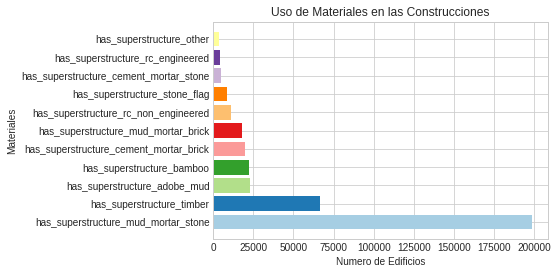

In [8]:
fig, ax = plt.subplots()

p1 = ax.barh(materialesmasusaddos.index, materialesmasusaddos,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Uso de Materiales en las Construcciones')
ax.set_ylabel('Materiales')
ax.set_xlabel('Numero de Edificios')

plt.show()

In [9]:
materialesmasusadosporcentajes = (types_of_materials.loc[:,['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].sum()/len(types_of_materials.index)).sort_values(ascending = False)*100

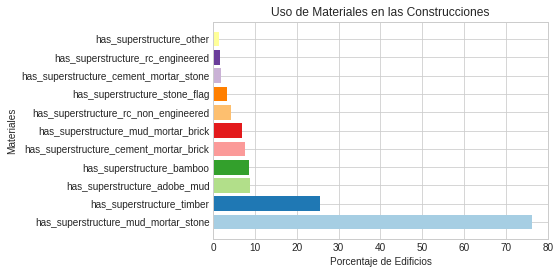

In [10]:
fig, ax = plt.subplots()

p1 = ax.barh(materialesmasusadosporcentajes.index, materialesmasusadosporcentajes,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Uso de Materiales en las Construcciones')
ax.set_ylabel('Materiales')
ax.set_xlabel('Porcentaje de Edificios')

plt.show()

In [11]:
familiasporgeo = train_values.groupby('geo_level_1_id')['count_families'].sum()

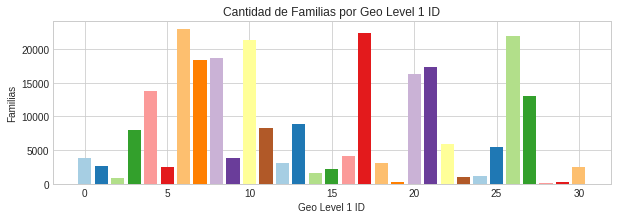

In [12]:
fig, ax = plt.subplots(figsize=(10, 3))

p1 = ax.bar(familiasporgeo.index, familiasporgeo,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Cantidad de Familias por Geo Level 1 ID')
ax.set_ylabel('Familias')
ax.set_xlabel('Geo Level 1 ID')

plt.show()

<AxesSubplot:xlabel='geo_level_2_id'>

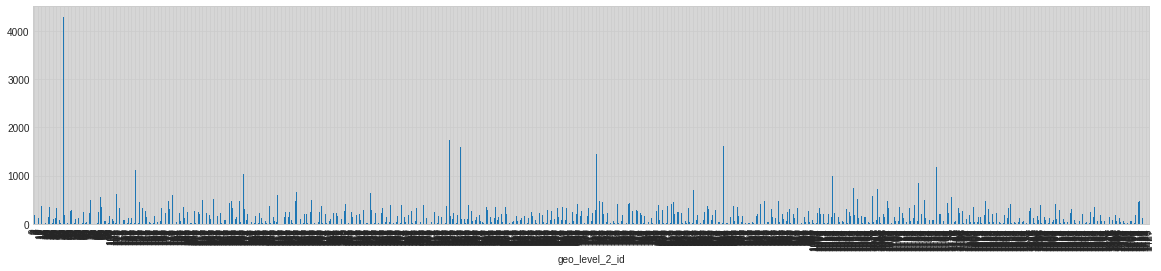

In [13]:
train_values.groupby('geo_level_2_id')['count_families'].sum().plot(kind='bar',figsize=(20, 4))

<AxesSubplot:xlabel='geo_level_3_id'>

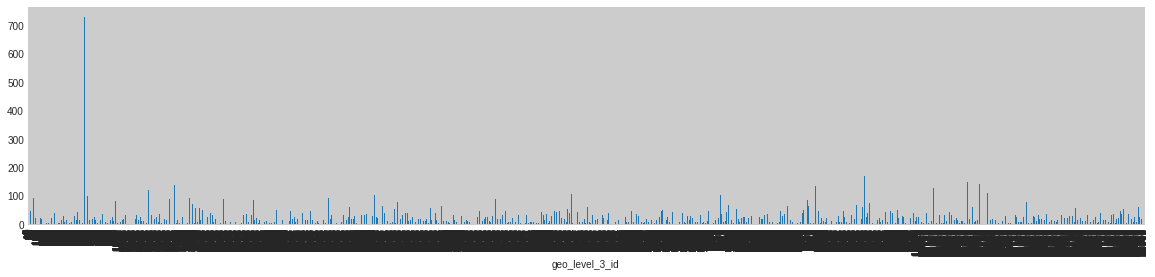

In [99]:
train_values.groupby('geo_level_3_id')['count_families'].sum().plot(kind='bar',figsize=(20, 4))

## Porcentaje de edificios con uso secundario respecto del total es del 11% aproximadamente

In [15]:
secondary_use = train_values[['has_secondary_use']]

In [16]:
secondary_use['Total'] = 1

<ipython-input-16-1d38510a6132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secondary_use['Total'] = 1


In [17]:
secondary_use_sum = secondary_use.sum()

In [18]:
secondary_use_sum

has_secondary_use     29156
Total                260601
dtype: int64

In [19]:
secondary_use_percentage= secondary_use.sum()/len(types_of_materials.index)*100

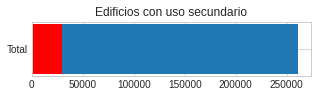

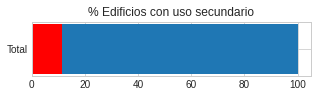

In [20]:
fig, ax = plt.subplots(figsize=(5, 1))
ax.barh('Total', secondary_use_sum.has_secondary_use, 0.35, color='red')
ax.barh('Total', secondary_use_sum.Total-secondary_use_sum.has_secondary_use,  0.35 ,left=secondary_use_sum.has_secondary_use)
ax.set_title('Edificios con uso secundario')

fig2, ax2 = plt.subplots(figsize=(5, 1))
ax2.barh('Total', secondary_use_percentage.has_secondary_use, 0.35, color = 'red')
ax2.barh('Total', secondary_use_percentage.Total-secondary_use_percentage.has_secondary_use,  0.35 ,left=secondary_use_percentage.has_secondary_use)
ax2.set_title('% Edificios con uso secundario')

plt.show()

In [21]:
secondary_use.sum()/len(types_of_materials.index)

has_secondary_use    0.11188
Total                1.00000
dtype: float64

## Distribucion de los tipos secundarios

In [22]:
edificiosantiguos = train_values.loc[ train_values['age']==995,[
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other','count_families']]


In [23]:
edificiosantiguos['count_families']= edificiosantiguos['count_families']/edificiosantiguos['count_families']

In [24]:
edificiosantiguos= edificiosantiguos.fillna(0)

In [25]:
porcentajesantiguos = edificiosantiguos.sum()/edificiosantiguos.count()*100

In [26]:
porcentajesantiguos.reset_index()

,index,0
0,has_secondary_use_agriculture,5.251799
1,has_secondary_use_hotel,3.812950
2,has_secondary_use_rental,1.726619
3,has_secondary_use_institution,0.071942
4,has_secondary_use_school,0.000000
5,has_secondary_use_industry,0.000000
6,has_secondary_use_health_post,0.000000
7,has_secondary_use_gov_office,0.000000
8,has_secondary_use_use_police,0.000000
9,has_secondary_use_other,0.215827


In [27]:
secondary_types= (train_values.loc[train_values['has_secondary_use']==1,[
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]).sum().sort_values(ascending = False)


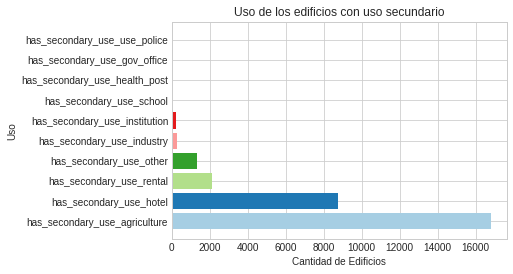

In [28]:
fig, ax = plt.subplots()

p1 = ax.barh(secondary_types.index, secondary_types,color = plt.cm.Paired(np.arange(12)))
ax.set_title('Uso de los edificios con uso secundario')
ax.set_ylabel('Uso')
ax.set_xlabel('Cantidad de Edificios')

plt.show()

## El tipo legal mas comun es "v"

<AxesSubplot:xlabel='legal_ownership_status'>

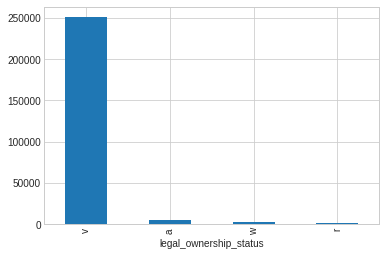

In [29]:
train_values.loc[:,['legal_ownership_status']].groupby('legal_ownership_status')['legal_ownership_status'].count().sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:xlabel='position'>

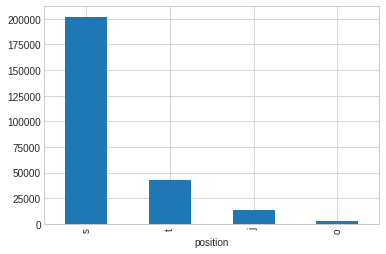

In [30]:

train_values.loc[:,['position']].groupby('position')['position'].count().sort_values(ascending = False).plot(kind='bar')

## La condicion de la superficie mas comun es "t"

<AxesSubplot:xlabel='land_surface_condition'>

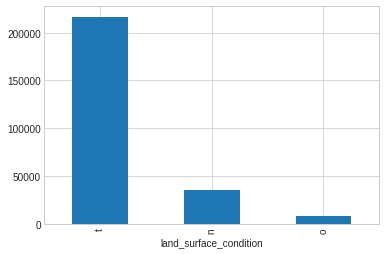

In [31]:

train_values.loc[:,['land_surface_condition']].groupby('land_surface_condition')['land_surface_condition'].count().sort_values(ascending = False).plot(kind='bar')


## El Cimiento mas comun es "r"

<AxesSubplot:xlabel='foundation_type'>

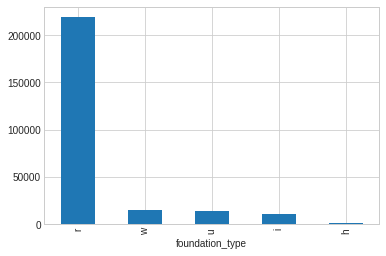

In [32]:
train_values.loc[:,['foundation_type']].groupby('foundation_type')['foundation_type'].count().sort_values(ascending = False).plot(kind='bar')


## La condicion de la superficie del terreno mas comun es "t"

<AxesSubplot:xlabel='land_surface_condition'>

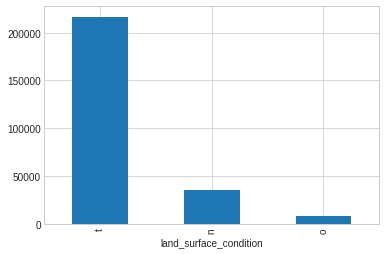

In [33]:

train_values.loc[:,['land_surface_condition']].groupby('land_surface_condition')['land_surface_condition'].count().sort_values(ascending = False).plot(kind='bar')

## El tipo de techo mas comun es "n"

<AxesSubplot:xlabel='roof_type'>

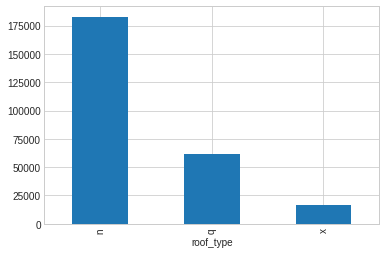

In [34]:
train_values.loc[:,['roof_type']].groupby('roof_type')['roof_type'].count().sort_values(ascending = False).plot(kind='bar')

## Tipo de piso mas comun "q"

<AxesSubplot:xlabel='other_floor_type'>

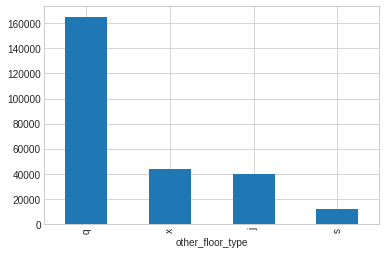

In [35]:
train_values.loc[:,['other_floor_type']].groupby('other_floor_type')['other_floor_type'].count().sort_values(ascending = False).plot(kind='bar')

## Tipo de planta baja mas comun "f"

<AxesSubplot:xlabel='ground_floor_type'>

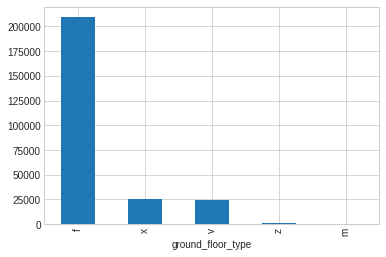

In [36]:
train_values.loc[:,['ground_floor_type']].groupby('ground_floor_type')['ground_floor_type'].count().sort_values(ascending = False).plot(kind='bar')

## La mayoria de los edificios tienen 2 pisos

<AxesSubplot:xlabel='count_floors_pre_eq'>

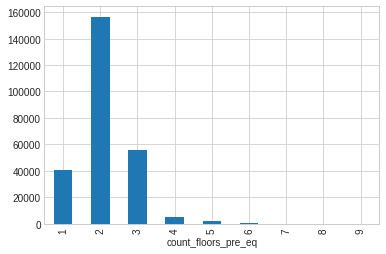

In [37]:
train_values.loc[:,['count_floors_pre_eq']].groupby('count_floors_pre_eq')['count_floors_pre_eq'].count().plot(kind='bar')

## La configuracion de plan mas comun es "d"

<AxesSubplot:xlabel='plan_configuration'>

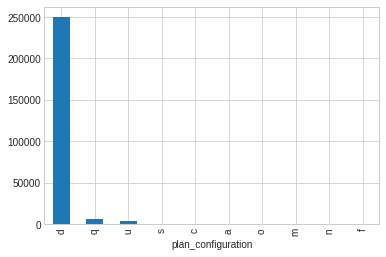

In [38]:
train_values.loc[:,['plan_configuration']].groupby('plan_configuration')['plan_configuration'].count().sort_values(ascending = False).plot(kind='bar')

## La distribucion de las edades de los edificios es la siguiente

<AxesSubplot:xlabel='age'>

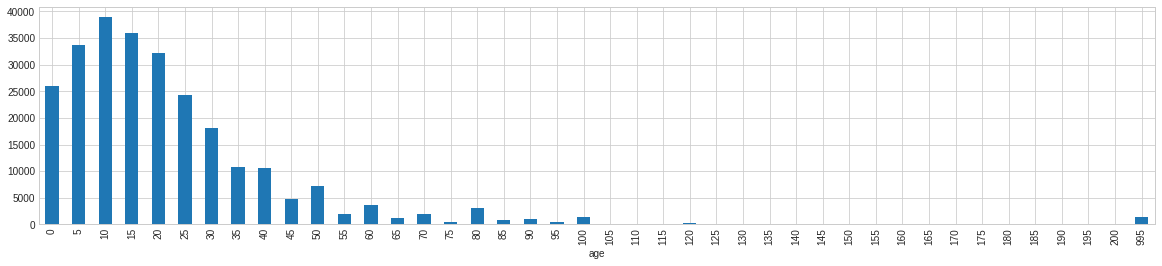

In [39]:

train_values.loc[:,['age']].groupby('age')['age'].count().plot(kind='bar',figsize=(20, 4))


Se puede ver que la mayoria de las edificaciones rondan los 30 años de antiguedad

## Porcentajes de areas edificadas

In [40]:
area_porcentages = train_values[['area_percentage']]

area_porcentages['total'] = 1

<ipython-input-40-92468b86f705>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_porcentages['total'] = 1


<AxesSubplot:xlabel='area_percentage'>

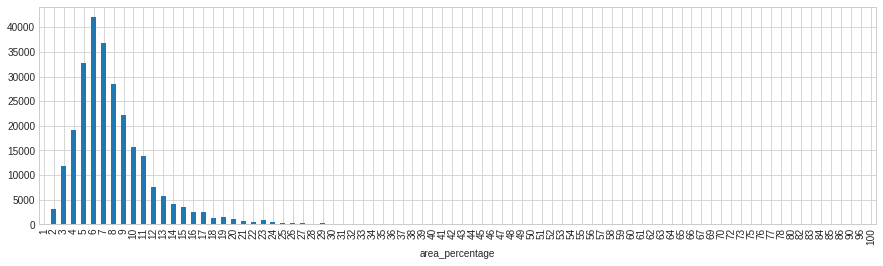

In [41]:
area_porcentages.groupby('area_percentage')['total'].sum().plot(kind='bar',figsize=(15, 4))

Se puede observar que el porcentaje de area construido es bastante reducido.

## Alturas mas comunes de edificios

<ipython-input-42-e59882e31f01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_porcentages['total'] = 1


<AxesSubplot:xlabel='height_percentage'>

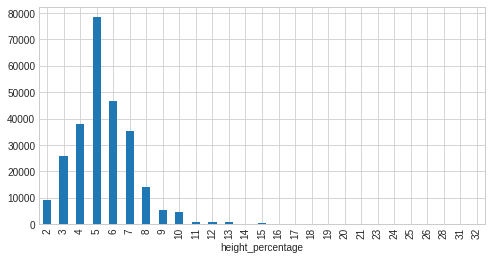

In [42]:
height_porcentages = train_values[['height_percentage']]

height_porcentages['total'] = 1
height_porcentages.groupby('height_percentage')['total'].sum().plot(kind='bar',figsize=(8, 4))
 

se puede observar que las edificacionesestan por lo general por debajo de los 10 metros???

## Distribucion de edades por level ID

In [43]:
geoidvsage = train_values.groupby(['age','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

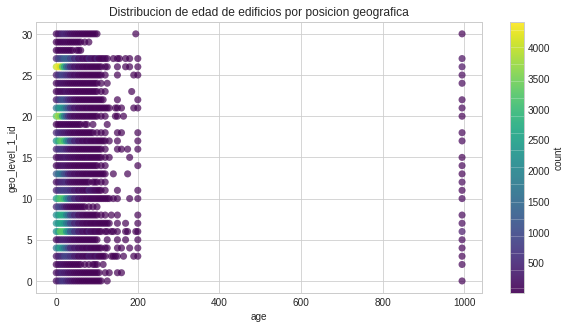

In [44]:
fig, ax = plt.subplots()
geoidvsage.plot(kind="scatter", x="age", y="geo_level_1_id", s=50, c="count",edgecolors = 'none', cmap="viridis", ax=ax,figsize=(10, 5),alpha =0.7,title='Distribucion de edad de edificios por posicion geografica');

aparentemente la region que contiene la mayor parte de edificios nuevos es el id 26

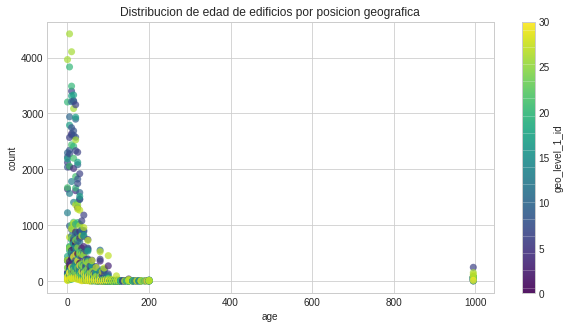

In [45]:
fig, ax = plt.subplots()
geoidvsage.plot(kind="scatter", x="age", y="count", s=50, c="geo_level_1_id",edgecolors = 'none', cmap="viridis", ax=ax,figsize=(10, 5),alpha =0.7,title='Distribucion de edad de edificios por posicion geografica');

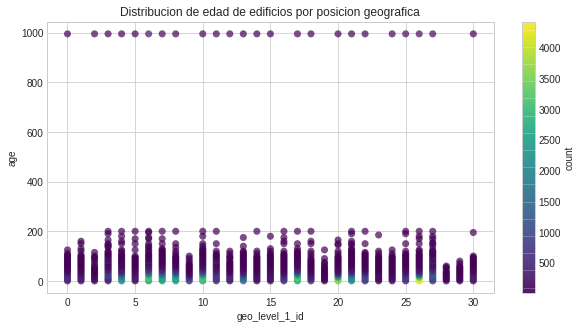

In [46]:
fig, ax = plt.subplots()
geoidvsage.plot(kind="scatter", x="geo_level_1_id", y="age", s=50, c="count",edgecolors = 'none', cmap="viridis", ax=ax,figsize=(10, 5),alpha =0.7,title='Distribucion de edad de edificios por posicion geografica');

<AxesSubplot:xlabel='age', ylabel='geo_level_2_id'>

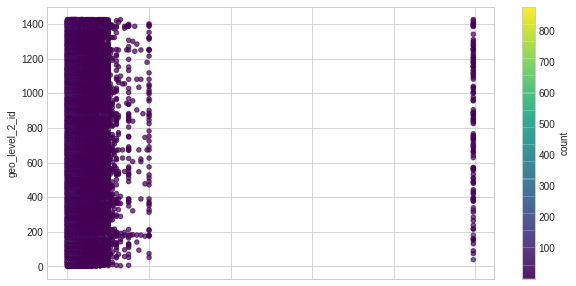

In [47]:
train_values.groupby(['age','geo_level_2_id'])['geo_level_2_id'].agg(['count']).reset_index().plot.scatter(x='age', y='geo_level_2_id',c='count',colormap='viridis',figsize=(10, 5),alpha =0.7)


<AxesSubplot:xlabel='age', ylabel='geo_level_3_id'>

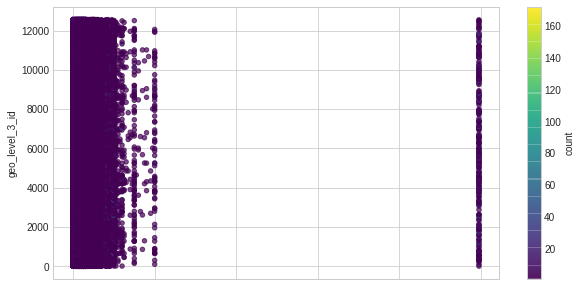

In [48]:
train_values.groupby(['age','geo_level_3_id'])['geo_level_3_id'].agg(['count']).reset_index().plot.scatter(x='age', y='geo_level_3_id',c='count',colormap='viridis',figsize=(10, 5),alpha =0.7)


## Distribucion de area por posicion geografica

In [49]:
geoidvsarea = train_values.groupby(['area_percentage','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

In [50]:
geoid2vsarea = train_values.groupby(['area_percentage','geo_level_2_id'])['geo_level_2_id'].agg(['count']).reset_index()

In [51]:
geoid3vsarea = train_values.groupby(['area_percentage','geo_level_3_id'])['geo_level_3_id'].agg(['count']).reset_index()

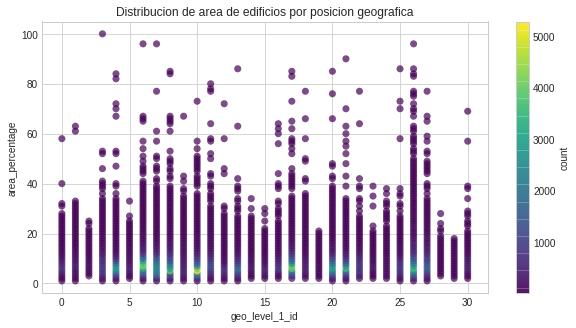

In [52]:
fig, ax = plt.subplots()
geoidvsarea.plot(kind="scatter", x="geo_level_1_id", y="area_percentage", s=50, c="count", cmap="viridis", ax=ax,figsize=(10, 5),alpha =0.7,edgecolors = 'none',title='Distribucion de area de edificios por posicion geografica');

## Distribucion de altura por posicion 

In [53]:
geoidvsaltura = train_values.groupby(['height_percentage','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

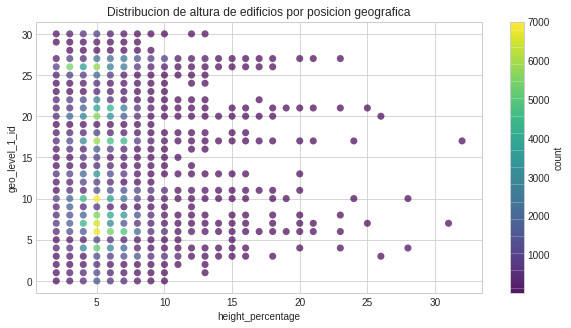

In [54]:
fig, ax = plt.subplots()
geoidvsaltura.plot(kind="scatter", x="height_percentage", y="geo_level_1_id", s=50, c="count", cmap="viridis", ax=ax,figsize=(10, 5),alpha =0.7,edgecolors = 'none',title='Distribucion de altura de edificios por posicion geografica');

In [55]:
geoidvspisos = train_values.groupby(['count_floors_pre_eq','geo_level_1_id'])['geo_level_1_id'].agg(['count']).reset_index()

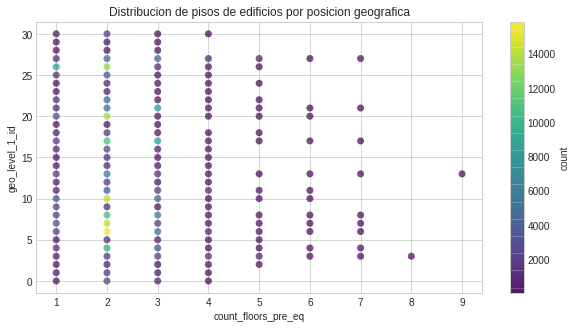

In [56]:
fig, ax = plt.subplots()
geoidvspisos.plot(kind="scatter", x="count_floors_pre_eq", y="geo_level_1_id", s=50, c="count", cmap="viridis", ax=ax,figsize=(10, 5),alpha =0.7,edgecolors = 'none',title='Distribucion de pisos de edificios por posicion geografica');

## Age VS pos 

In [57]:
table = pd.pivot_table(geoidvsage, values='count', index=['geo_level_1_id'],
                    columns=['age'], aggfunc=np.sum,fill_value=0)

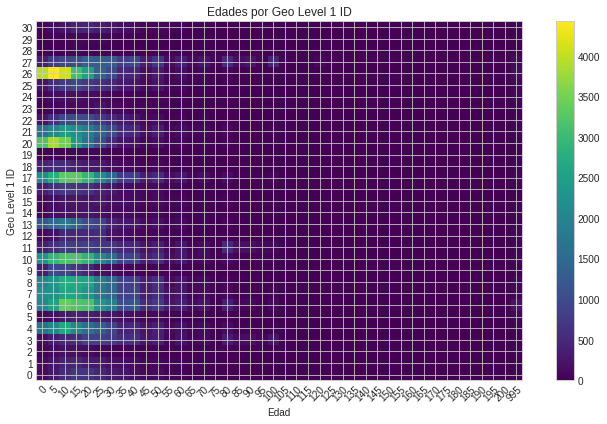

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(table,cmap= 'viridis')
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(table.columns)))
ax.set_yticks(np.arange(len(table.index)))

ax.set_xticklabels(table.columns)
ax.set_yticklabels(table.index)
ax.invert_yaxis()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Edades por Geo Level 1 ID")
ax.set_ylabel('Geo Level 1 ID')
ax.set_xlabel('Edad')
fig.tight_layout()
plt.show()

## Materiales vs pos

In [59]:
table2 = train_values.loc[:,['geo_level_1_id','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].groupby('geo_level_1_id').sum().T

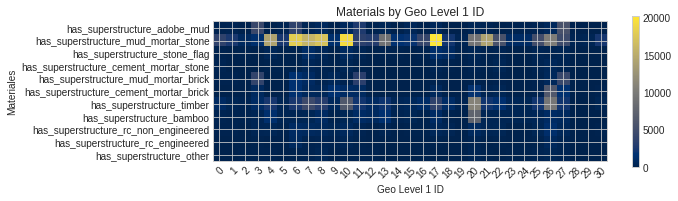

In [60]:
fig2, ax2 = plt.subplots(figsize=(10, 3))
im = ax2.imshow(table2,cmap= 'cividis')
cbar = ax2.figure.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(len(table2.columns)))
ax2.set_yticks(np.arange(len(table2.index)))

ax2.set_xticklabels(table2.columns)
ax2.set_yticklabels(table2.index)
ax2.set_title("Materials by Geo Level 1 ID")
ax2.set_ylabel('Materiales')
ax2.set_xlabel('Geo Level 1 ID')
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig2.tight_layout()
plt.show()

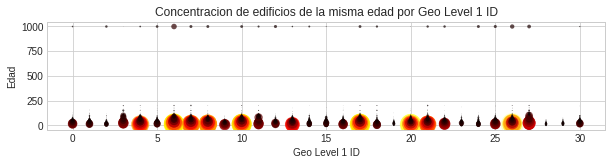

In [61]:
fig, ax = plt.subplots(figsize=(10, 2))

y = geoidvsage.age
x = geoidvsage.geo_level_1_id
scale =  geoidvsage['count']
ax.scatter(x, y, s=scale/8,c=scale,cmap = 'hot' ,alpha=0.7, edgecolors='none',marker='o')
ax.set_title("Concentracion de edificios de la misma edad por Geo Level 1 ID")
ax.set_ylabel('Edad')
ax.set_xlabel('Geo Level 1 ID')
plt.show()

## Relacion entre material y edad

In [62]:
table3 = train_values.loc[:,['age','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']].groupby('age').sum().T

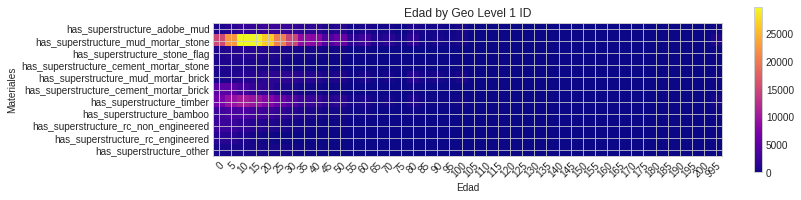

In [63]:
fig2, ax2 = plt.subplots(figsize=(12, 3))
im = ax2.imshow(table3,cmap= 'plasma')
cbar = ax2.figure.colorbar(im, ax=ax2)
ax2.set_xticks(np.arange(len(table3.columns)))
ax2.set_yticks(np.arange(len(table3.index)))

ax2.set_xticklabels(table3.columns)
ax2.set_yticklabels(table3.index)
ax2.set_title("Edad by Geo Level 1 ID")
ax2.set_ylabel('Materiales')
ax2.set_xlabel('Edad')
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig2.tight_layout()
plt.show()

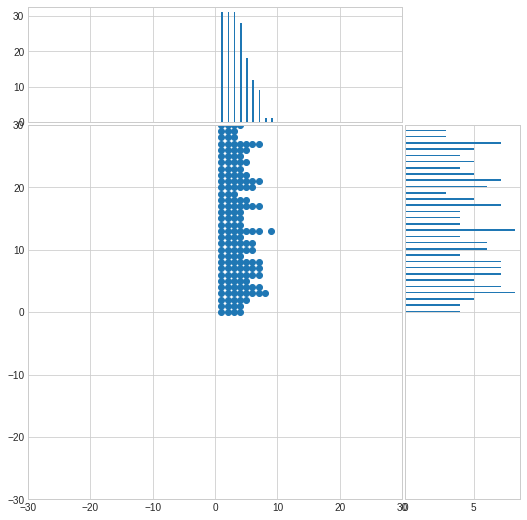

In [64]:
x = geoidvspisos.count_floors_pre_eq
y = geoidvspisos.geo_level_1_id

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


plt.show()

In [96]:
pisos = train_values.loc[:,['building_id','count_floors_pre_eq']].groupby('count_floors_pre_eq').count().reset_index()

In [97]:
pisos

,count_floors_pre_eq,building_id
0,1,40441
1,2,156623
2,3,55617
3,4,5424
4,5,2246
5,6,209
6,7,39
7,8,1
8,9,1


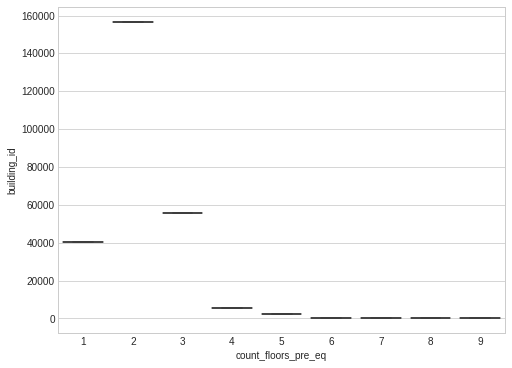

In [98]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='count_floors_pre_eq', y="building_id", data=pisos)